In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df['BMI'] = df['BMI'].astype(int)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33,0.627,50,1
1,1,85,66,29,0,26,0.351,31,0
2,8,183,64,0,0,23,0.672,32,1
3,1,89,66,23,94,28,0.167,21,0
4,0,137,40,35,168,43,2.288,33,1


In [9]:
df.columns = df.columns.str.lower()
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33,0.627,50,1
1,1,85,66,29,0,26,0.351,31,0
2,8,183,64,0,0,23,0.672,32,1
3,1,89,66,23,94,28,0.167,21,0
4,0,137,40,35,168,43,2.288,33,1


# Visualisation

# FEATURE VS TARGET

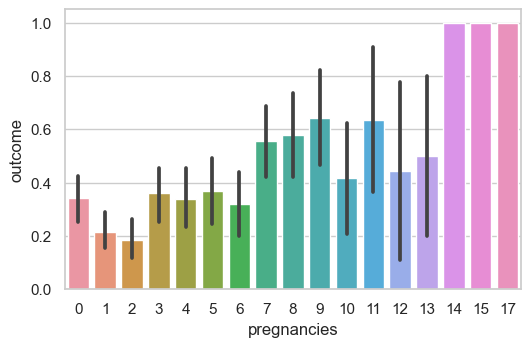

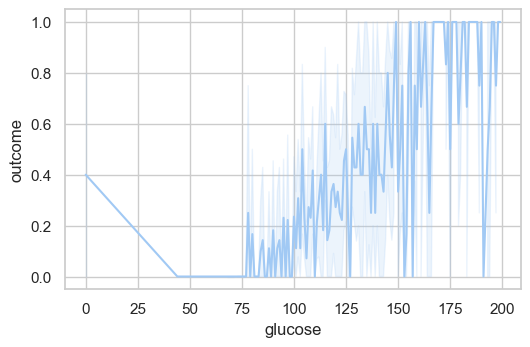

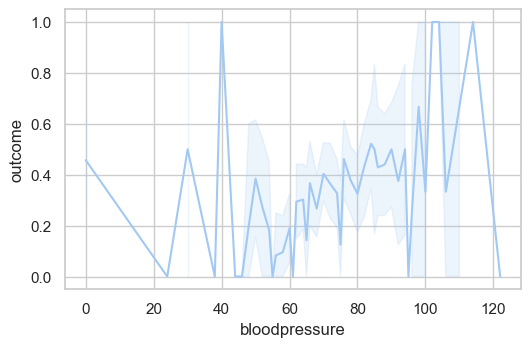

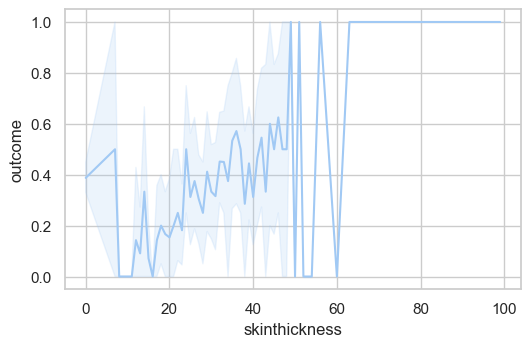

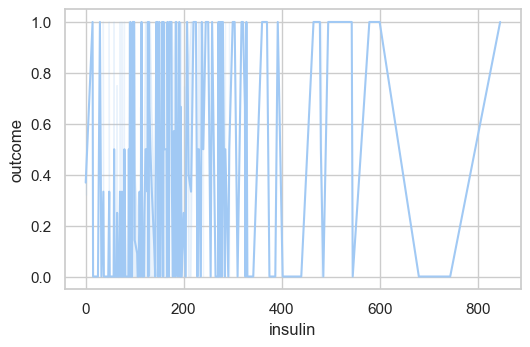

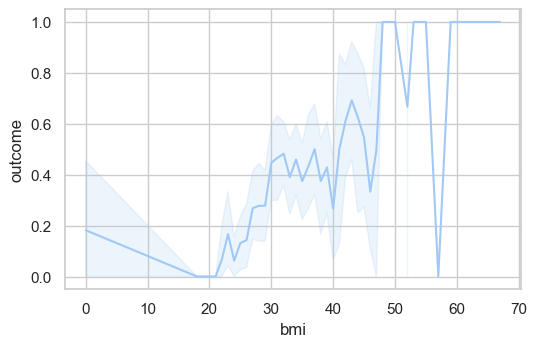

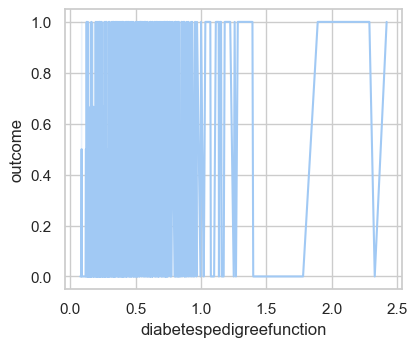

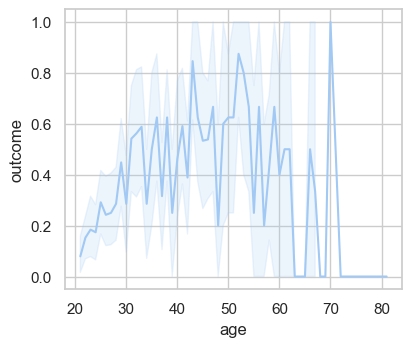

In [10]:
# FOR ALL COLUMNS

sns.set_theme(style='whitegrid',palette='pastel')

plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
sns.barplot(x= df['pregnancies'],data = df , y = df['outcome'])
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(2,3,2)
sns.lineplot(x= df['glucose'],data = df , y = df['outcome'])
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(2,3,3)
sns.lineplot(x= df['bloodpressure'],data = df , y = df['outcome'])
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(2,3,4)
sns.lineplot(x= df['skinthickness'],data = df , y = df['outcome'])
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(2,3,5)
sns.lineplot(x= df['insulin'],data = df , y = df['outcome'])
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(2,3,6)
sns.lineplot(x= df['bmi'],data = df , y = df['outcome'])
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(2,4,1)
sns.lineplot(x= df['diabetespedigreefunction'],data = df , y = df['outcome'])
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(2,4,2)
sns.lineplot(x= df['age'],data = df , y = df['outcome'])
plt.show()

# Remove columns which didnt correlated

In [11]:
df.drop(columns=['insulin','diabetespedigreefunction'],inplace=True,axis=1)
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,bmi,age,outcome
0,6,148,72,35,33,50,1
1,1,85,66,29,26,31,0
2,8,183,64,0,23,32,1
3,1,89,66,23,28,21,0
4,0,137,40,35,43,33,1


# Split Data into Train and Test

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [13]:
X = df.drop(columns='outcome',axis=1)
y = df['outcome']

In [14]:
X.head()

,pregnancies,glucose,bloodpressure,skinthickness,bmi,age
0,6,148,72,35,33,50
1,1,85,66,29,26,31
2,8,183,64,0,23,32
3,1,89,66,23,28,21
4,0,137,40,35,43,33


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [16]:
X_train

,pregnancies,glucose,bloodpressure,skinthickness,bmi,age
720,4,83,86,19,29,34
691,13,158,114,0,42,44
482,4,85,58,22,27,28
222,7,119,0,0,25,37
339,7,178,84,0,39,41
...,...,...,...,...,...,...
132,3,170,64,37,34,30
289,5,108,72,43,36,33
109,0,95,85,25,37,24
480,3,158,70,30,35,35


# machine Learning

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.6948051948051948

In [19]:
from sklearn.model_selection import cross_val_score #import
cross_val_linear_model = cross_val_score(model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.7802221047065044

# KNN Classifier

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

knn_values=np.arange(1,40)
cross_val_knn=[]
for k in knn_values:
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled,y_train)
    print("K value : ", k, " train score : ", knn_classifier.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_classifier,X_train_scaled,y_train,cv = 10).mean())
    cross_val_knn.append(cross_val_score(knn_classifier,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  1.0 cross_val_score :  0.6582496033844527
K value :  2  train score :  0.8403908794788274 cross_val_score :  0.6891327340031729
K value :  3  train score :  0.8322475570032574 cross_val_score :  0.7248016922263354
K value :  4  train score :  0.8029315960912052 cross_val_score :  0.7248545742993125
K value :  5  train score :  0.8208469055374593 cross_val_score :  0.7476203067160233
K value :  6  train score :  0.8175895765472313 cross_val_score :  0.7493918561607615
K value :  7  train score :  0.8224755700325733 cross_val_score :  0.767239555790587
K value :  8  train score :  0.8078175895765473 cross_val_score :  0.7607879428873611
K value :  9  train score :  0.8061889250814332 cross_val_score :  0.7608408249603384
K value :  10  train score :  0.8045602605863192 cross_val_score :  0.7641195134849287
K value :  11  train score :  0.8061889250814332 cross_val_score :  0.7558963511369645
K value :  12  train score :  0.8013029315960912 cross_val_score :  

In [21]:
cross_val_knn_classifier=max(cross_val_knn)

In [22]:
print("The best K-Value is 16 and Cross_val_score is",cross_val_knn_classifier )

The best K-Value is 16 and Cross_val_score is 0.7754362771020624


# Implementation

In [23]:
knn_classifier=KNeighborsClassifier(n_neighbors=16)
knn_classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=16)

In [24]:
cross_val_knn_classifier=cross_val_score(knn_classifier,X_train_scaled,y_train,cv=15).mean()
cross_val_knn_classifier

0.7735772357723577

# Decision Tree Classification

In [25]:
from sklearn.tree import DecisionTreeClassifier

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
    dt_classifier= DecisionTreeClassifier(max_depth=d, random_state=0)
    dt_classifier.fit(X_train,y_train)
    print("Depth : ", d, " train Score  : ", dt_classifier.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_classifier,X_train,y_train,cv = 10).mean())
    cross_val_dt.append(cross_val_score(dt_classifier,X_train,y_train,cv = 10).mean())

Depth :  1  train Score  :  0.745928338762215 cross_val_score :  0.7167636171337917
Depth :  2  train Score  :  0.7850162866449512 cross_val_score :  0.7542570068746696
Depth :  3  train Score  :  0.7899022801302932 cross_val_score :  0.7494447382337388
Depth :  4  train Score  :  0.8224755700325733 cross_val_score :  0.7638551031200423
Depth :  5  train Score  :  0.8420195439739414 cross_val_score :  0.7443151771549444
Depth :  6  train Score  :  0.8583061889250815 cross_val_score :  0.737625594923321
Depth :  7  train Score  :  0.8908794788273615 cross_val_score :  0.7410100475938657
Depth :  8  train Score  :  0.9234527687296417 cross_val_score :  0.7099682707562136
Depth :  9  train Score  :  0.9462540716612378 cross_val_score :  0.7115547329455315
Depth :  10  train Score  :  0.9609120521172638 cross_val_score :  0.7034902168164991
Depth :  11  train Score  :  0.9739413680781759 cross_val_score :  0.6985986250661025
Depth :  12  train Score  :  0.99185667752443 cross_val_score :  

In [26]:
cross_val_dt_classifier=max(cross_val_dt)

In [27]:
print("The best depth is 4 and Cross_val_score is:",cross_val_dt_classifier)

The best depth is 4 and Cross_val_score is: 0.7638551031200423


# Implementation

In [28]:
dt_classifier=DecisionTreeClassifier(max_depth=4, random_state=0)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [29]:
cross_val_dt_classifier=cross_val_score(dt_classifier,X_train,y_train,cv=10).mean()
cross_val_dt_classifier

0.7638551031200423

In [30]:
ftImp = list(zip(dt_classifier.feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
1,0.630398,glucose
4,0.229846,bmi
5,0.085666,age
0,0.034862,pregnancies
2,0.019228,bloodpressure
3,0.000000,skinthickness


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
    rf_classifier=RandomForestClassifier(max_depth=d, random_state=0)
    rf_classifier.fit(X_train,y_train)
    print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_classifier,X_train,y_train,cv = 15).mean())
    cross_val_rf.append(cross_val_score(rf_classifier,X_train,y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.7671544715447156
Depth :  4 cross_val_score :  0.7719512195121951
Depth :  8 cross_val_score :  0.76869918699187
Depth :  10 cross_val_score :  0.7686585365853659
Depth :  11 cross_val_score :  0.7540650406504066
Depth :  12 cross_val_score :  0.7589430894308943
Depth :  13 cross_val_score :  0.7670731707317074
Depth :  15 cross_val_score :  0.7670731707317073
Depth :  18 cross_val_score :  0.76869918699187
Depth :  20 cross_val_score :  0.7719512195121951


In [32]:
cross_val_rf_classifier=max(cross_val_rf)
print("The best depth is 20 and Cross_val_score is:",cross_val_rf_classifier)

The best depth is 20 and Cross_val_score is: 0.7719512195121951


# Implementation

In [33]:
rf_classifier=RandomForestClassifier(max_depth=20, random_state=0)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [34]:
cross_val_rf_classifier=cross_val_score(rf_classifier,X_train,y_train,cv=15).mean()
cross_val_rf_classifier

0.7719512195121951

# XG Boosting Classification

In [35]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
    xgb_classifier = xgb.XGBClassifier(learning_rate = lr,n_estimators=100)
    xgb_classifier.fit(X_train,y_train)
    print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_classifier,X_train,y_train,cv = 15).mean())
    cross_val_xgb.append(cross_val_score(xgb_classifier,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.776829268292683
Learning rate :  0.05 cross_val_score: 0.7669918699186992
Learning rate :  0.08 cross_val_score: 0.7604471544715448
Learning rate :  0.1 cross_val_score: 0.7604878048780487
Learning rate :  0.2 cross_val_score: 0.7343902439024391
Learning rate :  0.25 cross_val_score: 0.7458130081300813
Learning rate :  0.3 cross_val_score: 0.7409349593495935


In [36]:
cross_val_xgb_classifier=max(cross_val_xgb)
print("The best Learning rate is 0.01 and Cross_val_score is:",cross_val_xgb_classifier)

The best Learning rate is 0.01 and Cross_val_score is: 0.776829268292683


# Implementation

In [37]:
xgb_classifier= xgb.XGBClassifier(learning_rate =0.01,n_estimators=100) # initialise the model
xgb_classifier.fit(X_train,y_train) #train the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
cross_val_xgb_classifier=cross_val_score(xgb_classifier,X_train,y_train,cv=15).mean()
cross_val_xgb_classifier

0.776829268292683

# CV Score for all Models

In [39]:
print("Cross Validation Score for Logistic Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Classification Model:",cross_val_knn_classifier)
print("Cross Validation Score for Decision Tree Classification Model: ",cross_val_dt_classifier)
print("Cross Validation Score for Random Forest Classification Model: ",cross_val_rf_classifier)
print("Cross Validation Score for Extreme-Gradient Boosting Classification Model: ",cross_val_xgb_classifier)

Cross Validation Score for Logistic Regression Model: 0.7802221047065044
Cross Validation Score for K-Nearest Neighbors Classification Model: 0.7735772357723577
Cross Validation Score for Decision Tree Classification Model:  0.7638551031200423
Cross Validation Score for Random Forest Classification Model:  0.7719512195121951
Cross Validation Score for Extreme-Gradient Boosting Classification Model:  0.776829268292683


In [40]:
xgb_classifier.feature_importances_

array([0.09198637, 0.4471599 , 0.0598902 , 0.05296698, 0.19001482,
       0.1579817 ], dtype=float32)

In [41]:
df.tail()

,pregnancies,glucose,bloodpressure,skinthickness,bmi,age,outcome
763,10,101,76,48,32,63,0
764,2,122,70,27,36,27,0
765,5,121,72,23,26,30,0
766,1,126,60,0,30,47,1
767,1,93,70,31,30,23,0


# Important Features 

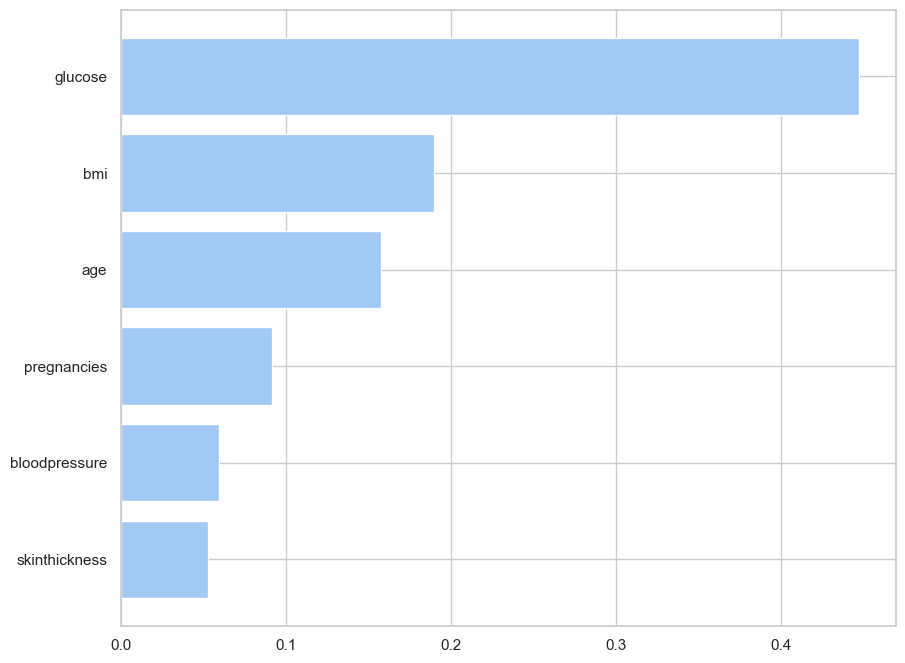

In [42]:
sorted_idx = xgb_classifier.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(df.columns[sorted_idx], xgb_classifier.feature_importances_[sorted_idx])
plt.show()

# Conclusion